In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard,ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Loading the Datasets

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafío Itau/X6.csv')
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafío Itau/y3.csv')

In [ ]:
X

,Unnamed: 0,A-G,A-K,A-L,C-C,D-F,E-F,F-D,F-H,F-I,F-J,G-K,Lectura,ComAA,ComBB,ComCD,ComDE,ComEE,Sexo,Recibe_sueldo_en_cuenta,Entre 25 y 30,Entre 30 y 35,Entre 35 y 40,Entre 40 y 45,Entre 45 y 50,Entre 50 y 55,Entre 55 y 60,Entre 60 y 65,Entre 65 y 70,Mayor a 70,Menor a 25,R1,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R2,R20,R21,R3,R4,R5,R6,R7,R8,R9,SegmentoConsumidor
0,0,4953988,-3.686182e+07,0.000000e+00,0.000000e+00,0,0,7.321078e+06,-7.561078e+06,-1.549649e+06,7.561078e+06,-5.770217e+06,1.0,0.0,1.0,0.0,1.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,8433301,-2.367750e+07,0.000000e+00,-1.605180e+07,-1699501,-384461,2.664929e+07,-1.151481e+06,-9.371714e+06,2.784929e+07,-4.938157e+07,1.0,0.0,1.0,1.0,1.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,10501637,-3.556323e+07,1.120000e+06,0.000000e+00,0,-1367568,1.802073e+06,-2.282073e+06,-6.012641e+05,2.282073e+06,-2.034374e+07,1.0,0.0,1.0,0.0,1.0,1.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,3696143,-9.662305e+06,1.697867e+05,0.000000e+00,-491115,-618740,6.297714e+07,-6.345714e+07,-1.440000e+06,6.513714e+07,-2.362493e+07,1.0,0.0,1.0,1.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2327401,-9.319559e+06,0.000000e+00,0.000000e+00,-243570,-363838,2.811429e+06,-4.611429e+06,-4.491429e+06,4.611429e+06,-3.446029e+07,1.0,0.0,1.0,1.0,1.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79534,79534,3161029,-1.767045e+07,0.000000e+00,0.000000e+00,-854239,-240947,2.292857e+06,-2.115000e+06,-3.372857e+06,3.492857e+06,-3.040691e+07,1.0,0.0,1.0,1.0,1.0,1.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79535,79535,3621677,-1.738624e+07,0.000000e+00,0.000000e+00,0,0,2.034100e+06,-1.539227e+06,-3.234100e+06,2.971243e+06,-3.196310e+07,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79536,79536,130260,-2.513137e+05,0.000000e+00,-8.082290e+06,0,-495712,8.725352e+06,-3.198913e+06,0.000000e+00,8.965352e+06,0.000000e+00,1.0,0.0,1.0,1.0,1.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79537,79537,3423924,-1.027632e+07,0.000000e+00,0.000000e+00,-245428,-241000,2.760000e+05,-1.588571e+06,-1.828571e+06,2.196000e+06,-7.167486e+06,1.0,0.0,1.0,0.0,1.0,1.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X.drop(['Unnamed: 0'] , axis = 1 , inplace = True)
y.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [ ]:
X.columns

Index(['A-G', 'A-K', 'A-L', 'C-C', 'D-F', 'E-F', 'F-D', 'F-H', 'F-I', 'F-J',
       'G-K', 'Lectura', 'ComAA', 'ComBB', 'ComCD', 'ComDE', 'ComEE', 'Sexo',
       'Recibe_sueldo_en_cuenta', 'Entre 25 y 30', 'Entre 30 y 35',
       'Entre 35 y 40', 'Entre 40 y 45', 'Entre 45 y 50', 'Entre 50 y 55',
       'Entre 55 y 60', 'Entre 60 y 65', 'Entre 65 y 70', 'Mayor a 70',
       'Menor a 25', 'R1', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16',
       'R17', 'R18', 'R19', 'R2', 'R20', 'R21', 'R3', 'R4', 'R5', 'R6', 'R7',
       'R8', 'R9', 'SegmentoConsumidor'],
      dtype='object')

In [ ]:
y

,A-A,B-B,C-D,D-E,E-E
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...
79534,0.0,0.0,0.0,1.0,1.0
79535,0.0,0.0,0.0,0.0,0.0
79536,0.0,0.0,1.0,1.0,1.0
79537,0.0,0.0,0.0,1.0,0.0


# Splitting the Data

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.20)

In [ ]:
X_train.shape

(63631, 52)

# Scaling the Data

In [ ]:
scaler_x = MinMaxScaler()
X = scaler_x.fit_transform(X_train)

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.020438,0.975571,0.016603,1.000000,1.000000,1.000000,0.000000,0.999946,0.996835,0.000069,0.753542,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.017310,0.960597,0.023616,1.000000,0.878341,1.000000,0.000087,0.999983,0.995299,0.000093,0.829410,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.012977,0.971693,0.004055,1.000000,1.000000,1.000000,0.000007,0.999935,0.996651,0.000073,0.858095,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.024824,0.980091,0.000000,0.955496,1.000000,0.946705,0.000238,0.999996,1.000000,0.000277,0.781758,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.093542,0.895563,0.100524,1.000000,1.000000,1.000000,0.000107,0.999996,0.995420,0.000147,0.988682,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63626,0.020636,0.867644,0.000000,0.999521,0.975583,1.000000,0.000566,0.999989,0.996016,0.000599,0.999070,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
63627,0.010027,0.989862,0.057538,1.000000,1.000000,0.856840,0.000013,0.999951,0.998131,0.000049,0.738382,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
63628,0.015658,0.978514,0.000000,1.000000,1.000000,1.000000,0.000000,0.999953,0.999297,0.000051,0.975939,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
63629,0.009229,0.982711,0.000000,0.989828,0.976181,0.959254,0.000004,0.999952,0.997684,0.000069,0.684891,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_test = scaler_x.transform(X_test)

# The Model

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim=52, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(5, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               10600     
_________________________________________________________________
dense_13 (Dense)             (None, 800)               160800    
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 4005      
Total params: 175,405
Trainable params: 175,405
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics =['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=300, batch_size=1000,  verbose=1, validation_split=0.2)

Epoch 1/300
51/51 [==============================] - 0s 6ms/step - loss: 0.4592 - accuracy: 0.3125 - val_loss: 0.4328 - val_accuracy: 0.3516
Epoch 2/300
51/51 [==============================] - 0s 4ms/step - loss: 0.4244 - accuracy: 0.3443 - val_loss: 0.4236 - val_accuracy: 0.3423
Epoch 3/300
51/51 [==============================] - 0s 4ms/step - loss: 0.4120 - accuracy: 0.3551 - val_loss: 0.4087 - val_accuracy: 0.3845
Epoch 4/300
51/51 [==============================] - 0s 4ms/step - loss: 0.3968 - accuracy: 0.3738 - val_loss: 0.3942 - val_accuracy: 0.4028
Epoch 5/300
51/51 [==============================] - 0s 4ms/step - loss: 0.3834 - accuracy: 0.3875 - val_loss: 0.3835 - val_accuracy: 0.3656
Epoch 6/300
51/51 [==============================] - 0s 4ms/step - loss: 0.3719 - accuracy: 0.3963 - val_loss: 0.3722 - val_accuracy: 0.4109
Epoch 7/300
51/51 [==============================] - 0s 4ms/step - loss: 0.3650 - accuracy: 0.4000 - val_loss: 0.3653 - val_accuracy: 0.4029
Epoch 8/300
5

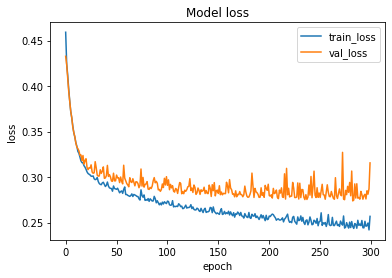

In [ ]:
# Plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# Predictions

In [ ]:
def probMaker(x):
  if x>= 0.5:
    x = 1
  else:
    x = 0
  return x
results = model.predict(X_test)
results = pd.DataFrame(results)
for i in results.columns.values:
  results[i] = results[i].apply(probMaker)

NameError: ignored

In [ ]:
results = pd.DataFrame(results)

In [ ]:
results.max()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [ ]:
for i in results.columns.values:
  results[i] = results[i].apply(probMaker)

In [ ]:
results.iloc[1000:1010]

,0,1,2,3,4
1000,0,0,0,0,1
1001,0,0,0,0,1
1002,0,0,0,0,0
1003,0,0,0,0,0
1004,0,0,0,1,0
1005,0,0,0,0,0
1006,0,0,0,0,0
1007,1,0,0,1,0
1008,0,0,0,1,1
1009,0,0,1,1,0


In [ ]:
y_test.iloc[1000:1010]

,A-A,B-B,C-D,D-E,E-E
31521,0.0,0.0,0.0,0.0,1.0
72074,0.0,0.0,1.0,1.0,0.0
62903,0.0,0.0,0.0,1.0,0.0
8408,1.0,0.0,0.0,0.0,0.0
58950,0.0,0.0,1.0,1.0,1.0
59240,0.0,0.0,0.0,0.0,1.0
33809,0.0,0.0,0.0,0.0,0.0
66433,0.0,0.0,1.0,1.0,0.0
2803,0.0,0.0,1.0,1.0,1.0
69602,0.0,0.0,1.0,1.0,0.0


# Predictions

In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafío Itau/XTest.csv')

In [ ]:
X_test.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [ ]:
X_test

,A-G,A-K,A-L,C-C,D-F,E-F,F-D,F-H,F-I,F-J,G-K,Lectura,ComAA,ComBB,ComCD,ComDE,ComEE,Sexo,Recibe_sueldo_en_cuenta,Entre 25 y 30,Entre 30 y 35,Entre 35 y 40,Entre 40 y 45,Entre 45 y 50,Entre 50 y 55,Entre 55 y 60,Entre 60 y 65,Entre 65 y 70,Mayor a 70,Menor a 25,R1,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R2,R20,R21,R3,R4,R5,R6,R7,R8,R9,SegmentoConsumidor
0,1149213,-4.900651e+06,0.0000,0.000000e+00,0,0,1.402857e+06,-1.402857e+06,-1402857.125,1.402857e+06,-2.690158e+06,1.0,0.0,1.0,0.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1113246,-2.996131e+06,0.0000,-3.694527e+06,-121141,0,0.000000e+00,-3.600000e+05,0.000,3.600000e+05,-7.671284e+06,1.0,0.0,1.0,1.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2510778,-4.986702e+06,0.0000,0.000000e+00,0,-123745,1.200361e+05,-3.600361e+05,0.000,3.600361e+05,-6.503626e+05,1.0,0.0,1.0,0.0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1122183,-1.001903e+06,548571.4375,0.000000e+00,0,-121428,0.000000e+00,-1.200000e+05,-240000.000,3.600000e+05,-2.947002e+06,1.0,0.0,0.0,1.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,494103,-6.065471e+05,0.0000,0.000000e+00,0,0,0.000000e+00,-3.600000e+05,-120000.000,3.600000e+05,-4.998845e+06,1.0,0.0,1.0,0.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79534,678924,-1.171770e+06,0.0000,-6.029971e+05,-122047,0,0.000000e+00,-2.400000e+05,-360000.000,3.600000e+05,-7.566180e+06,1.0,0.0,1.0,0.0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79535,713488,-3.674494e+05,0.0000,0.000000e+00,0,0,1.270000e+05,-1.200000e+05,-247000.000,2.470000e+05,-5.894302e+06,0.0,0.0,1.0,0.0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79536,568955,-2.513046e+05,0.0000,0.000000e+00,0,-150370,1.028571e+06,-1.200000e+05,0.000,1.148571e+06,0.000000e+00,0.0,0.0,1.0,1.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79537,767589,-2.220285e+06,0.0000,0.000000e+00,0,0,0.000000e+00,-3.600000e+05,-360000.000,3.600000e+05,-2.487990e+05,1.0,0.0,1.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_test = scaler_x.transform(X_test)
X_test

array([[0.03140915, 0.92204785, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.03042614, 0.95234208, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.0686221 , 0.92067909, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.01555012, 0.99600263, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.02097898, 0.96468306, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
results = model.predict(X_test)
results = pd.DataFrame(results)
for i in results.columns.values:
  results[i] = results[i].apply(probMaker)

In [ ]:
results

,0,1,2,3,4
0,0,0,0,1,0
1,0,0,1,1,1
2,0,0,0,1,1
3,0,0,0,1,0
4,0,0,0,1,1
...,...,...,...,...,...
79534,0,0,1,1,1
79535,0,0,0,1,1
79536,0,0,0,1,0
79537,0,0,0,1,0


In [ ]:
#results.to_pickle('/content/drive/MyDrive/Colab Notebooks/Desafío Itau/Answers.pkl')

In [ ]:
results.to_csv('/content/drive/MyDrive/Colab Notebooks/Desafío Itau/Answers3.csv')

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Desafío Itau/ModeloItau1.h5')

In [ ]:
from keras.models import load_model
new_model = load_model('/content/drive/MyDrive/Colab Notebooks/Desafío Itau/ModeloItau1.h5')

In [ ]:
r2 = new_model.predict(X_test)

In [ ]:
def probMaker(x):
  if x>= 0.5:
    x = 1
  else:
    x = 0
  return x
results = pd.DataFrame(r2)
for i in results.columns.values:
  results[i] = results[i].apply(probMaker)

In [ ]:
results

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,1,1,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,0
...,...,...,...,...,...
79534,0,0,0,1,0
79535,0,0,0,0,0
79536,0,0,0,0,1
79537,0,0,0,0,0


In [ ]:
results.to_csv('/content/drive/MyDrive/Colab Notebooks/Desafío Itau/Answers5.csv')